<a href="https://colab.research.google.com/github/redha-abushaheen/sdiaa-bootcamp/blob/main/sdaia%20bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Predicting the Maliciousness of URLs

# **Predicting the Maliciousness of URLs**

In [2]:
from requests import get
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from datetime import datetime


**Exploratory Data Analysis¶
*

For this dataset , we will be using seaborn and matplot lib to explore the data. We will be using pandas, numpy and sklearn to train the model 

Datasource: https://www.kaggle.com/shashwatwork/web-page-phishing-detection-dataset

First we will read the *data*

In [3]:
df = pd.read_csv('dataset_phishing.csv')

**Description**

The datset contin multiple URL . Some of the dataset is malcious and some is legitmate 



The main feature we are interested in is the status of the URL and is it legitimate or not 

I will also check if there are any hints contain in the data to indicate if the URL is phishing 


Check the data using info, describe and head method

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,...,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,0.322660,0.006649,0.123097,4.289589,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,...,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.0,0.784864,0.0,0.158926,0.0,0.062469,0.063605,0.442170,51.978211,0.0,42.870444,23.236293,0.0,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,1.093336,0.081274,1.466450,1.882251,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,...,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,0.0,2.758802,0.0,0.266437,0.0,0.156209,0.244058,0.496666,41.523144,0.0,46.249897,38.386577,0.0,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0

In [6]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,...,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,...,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,...,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,...,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,...,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,...,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


Clean the data

In [7]:
df2 = df.drop(df[df['domain_age']<0].index)
df2 = df.drop(df[df['domain_registration_length']<0].index)



In [8]:
df2.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,...,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.0,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,...,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.0,11384.000000,11384.0,11384.000000,11384.0,11384.000000,11384.000000,11384.000000,11384.000000,11384.0,11384.000000,11384.000000,11384.0,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,1.138400e+04,11384.000000,11384.000000,11384.000000
mean,61.180341,21.106817,0.150562,2.481817,0.998419,0.022312,0.141339,0.162860,0.0,0.293833,0.323524,0.006676,0.122804,4.291022,0.000703,1.028022,0.004041,0.062544,0.001933,0.034698,0.447646,0.128338,0.006500,0.016778,0.610857,0.053111,0.025082,0.000351,0.002372,0.065794,0.050334,0.021609,2.231729,0.202565,0.082484,0.123770,0.000176,0.498946,0.003162,6.238493,...,7.262265,7.684204,5.091818,0.328707,0.104621,0.004129,0.004919,0.018008,0.059996,87.152670,0.602439,0.276953,0.0,0.785840,0.0,0.158795,0.0,0.062389,0.063335,0.442639,51.973157,0.0,42.854661,23.264454,0.0,0.001318,0.006061,37.077296,0.001142,0.001405,0.124561,0.776001,0.439476,0.072207,494.526441,4075.306483,8.574212e+05,0.020204,0.534786,3.186490
std,55.366053,10.790181,0.357637,1.371906,2.088820,0.155807,0.364649,0.822894,0.0,1.000050,1.095119,0.081437,1.468290,1.883566,0.026501,0.240804,0.103448,0.599384,0.077266,0.376001,0.501846,0.379513,0.080366,0.169697,0.487577,0.089230,0.093570,0.018742,0.048645,0.247933,0.218642,0.145410,0.637402,0.401929,0.275113,0.329334,0.013254,0.692322,0.056148,5.578251,...,4.150000,3.581614,7.147646,0.843659,0.306077,0.064124,0.069967,0.132985,0.331913,166.610948,0.376548,0.320201,0.0,2.763034,0.0,0.266434,0.0,0.156053,0.243574,0.496721,41.525763,0.0,46.247007,38.405648,0.0,0.036277,0.077620,39.095879,0.033775,0.037465,0.330235,0.416939,0.496345,0.258841,815.808557,3104.100567,1.996622e+06,0.140703,0.498810,2.539801
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.

I want to see how many rows were deleted after dropping domains with age -1

In [9]:
df.shape


(11430, 89)

In [10]:
df2.shape

(11384, 89)

For fun, i will see how many websites had SSL certifcate which may trick users in viewing the site as *legitmate*

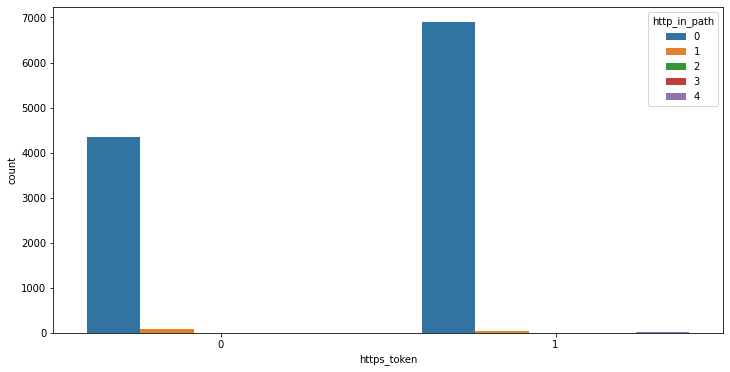

In [11]:
plt.subplots(figsize = (12,6))
sns.countplot(x = 'https_token', hue = 'http_in_path', data = df2)

Most browser warn from http website and allow https . We can see from the plot that the number of https url are extremly low 

let us see the google index for the url

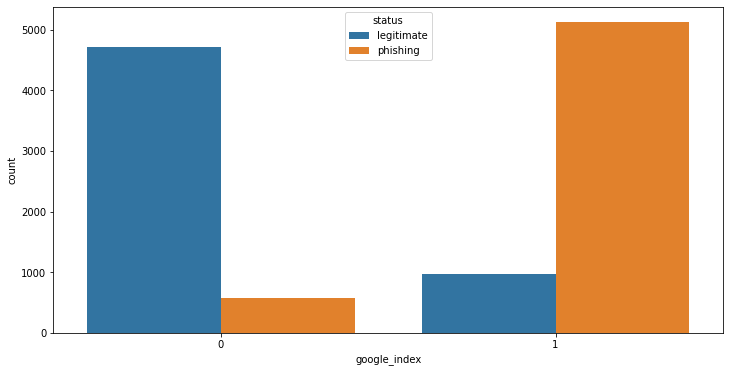

In [12]:
plt.subplots(figsize = (12,6))
sns.countplot(x = 'google_index', hue = 'status', data = df2)


the split is almost 50/50 for URL indexed by google
```
# This is formatted as code
```



How many suspcious tld are there? How many phishing hints are there?

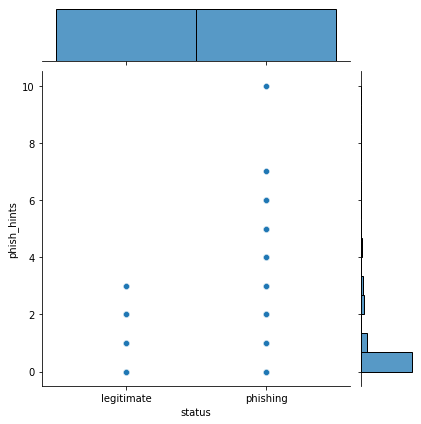

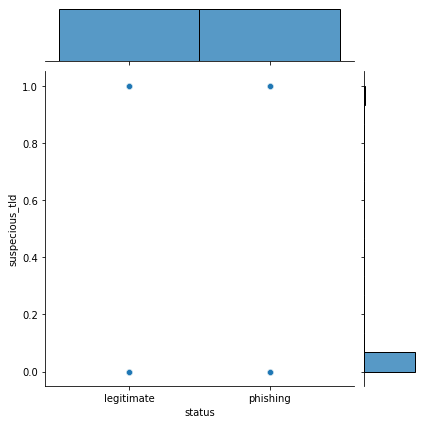

In [13]:
sns.jointplot(data=df, y="phish_hints", x="status")
sns.jointplot(data=df, y="suspecious_tld", x="status")

We can see that the number of hints that the website is phihsing is low compared to legitamte website

Do the websites have web traffic?

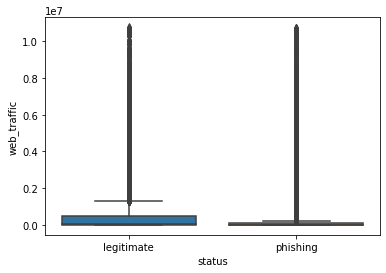

In [14]:
sns.boxplot(data=df2, y="web_traffic", x="status")


We can see from the graph above that there is very low trffic for phishing website which lead me to believe the URL is knonw phishing . It seems to be most of the datset consist of outliers when it come to web traffic

how many phishing websites in the dataset?

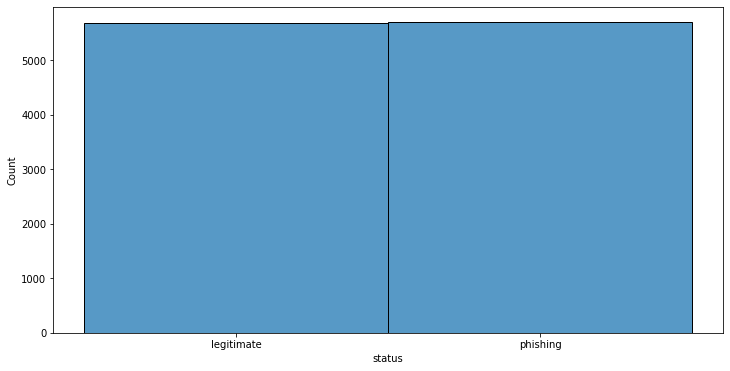

In [15]:
plt.subplots(figsize = (12,6))
sns.histplot(x = 'status',  data = df2)

the dataset seem to be balanced between legitame and phishing websites

how does the status of the website relate to some features ?

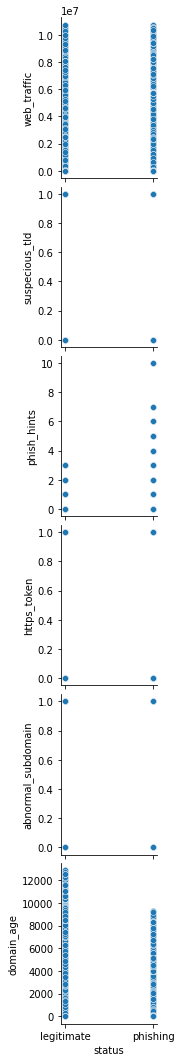

In [16]:
pp = sns.pairplot(data=df2,
                  x_vars=['status'],
                  y_vars=['web_traffic', 'suspecious_tld', 'phish_hints', 'https_token','abnormal_subdomain','domain_age'])

Since this is a huge data set , we need to seperate the features when determine multi colinarity 

In [17]:
df2.shape

(11384, 89)

In [18]:
#seperate dataset by data type
objects = [i for i in df2.columns if 'object' in str(df.dtypes[i])]
ints = [i for i in df2.columns if 'int' in str(df.dtypes[i]) or 'float' in str(df.dtypes[i])]

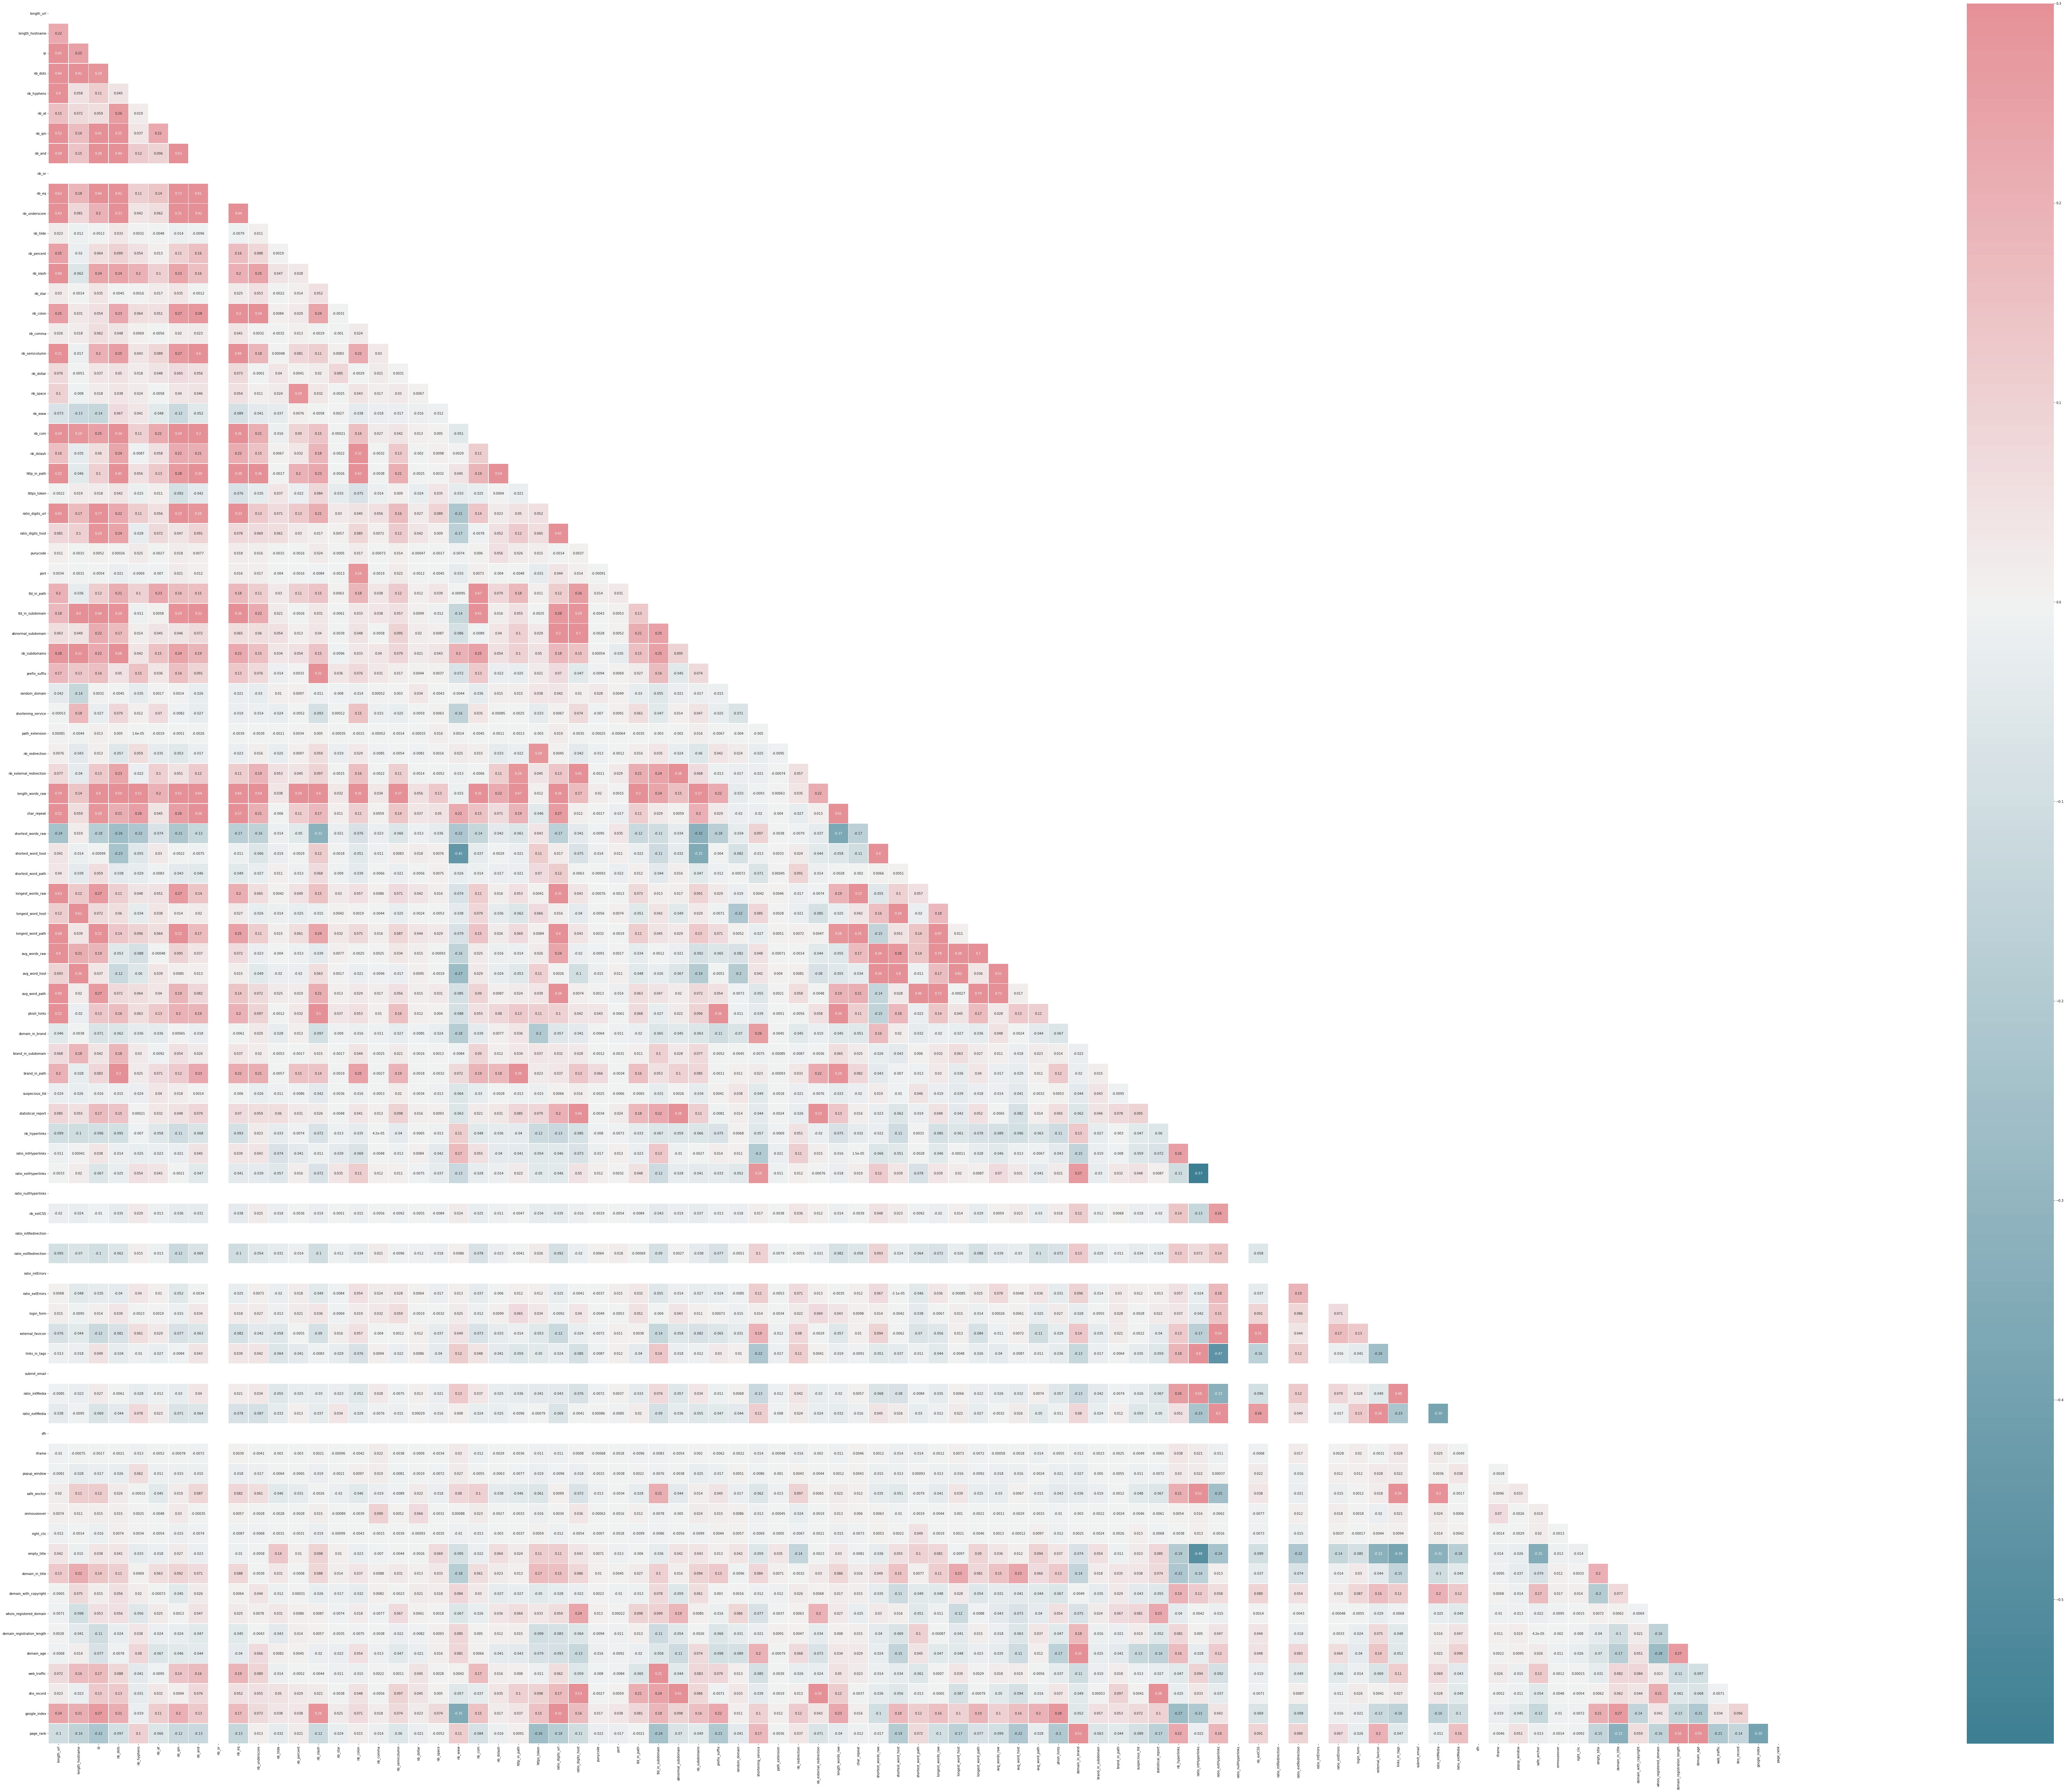

In [19]:

corr = df[ints].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(200, 100))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5,  annot=True)

As you can see from the map above, the feature is unreadable and hard to desribe using the naked eyes . We will use code to seperate multi colnairty features 

```
# This is formatted as code
```



In [20]:
def dropMultiCorrelated(cor, threshold):
    ##Define threshold to remove pairs of features with correlation coefficient greater than 0.7 or -0.7
    threshold = 0.7

    # Select upper triangle of correlation matrix
    upper = cor.abs().where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    for d in to_drop:
        print("Dropping {}....".format(d))
    return to_drop

df3 = dropMultiCorrelated(df2[ints].corr(), 0.7)

Dropping nb_eq....
Dropping ratio_digits_url....
Dropping abnormal_subdomain....
Dropping length_words_raw....
Dropping longest_word_path....
Dropping avg_words_raw....
Dropping avg_word_host....
Dropping avg_word_path....
Dropping links_in_tags....


In [21]:
df3

['nb_eq',
 'ratio_digits_url',
 'abnormal_subdomain',
 'length_words_raw',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'links_in_tags']

In [22]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,...,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,...,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,...,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,...,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,...,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,...,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


In [23]:
df4=df2
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11384 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11384 non-null  object 
 1   length_url                  11384 non-null  int64  
 2   length_hostname             11384 non-null  int64  
 3   ip                          11384 non-null  int64  
 4   nb_dots                     11384 non-null  int64  
 5   nb_hyphens                  11384 non-null  int64  
 6   nb_at                       11384 non-null  int64  
 7   nb_qm                       11384 non-null  int64  
 8   nb_and                      11384 non-null  int64  
 9   nb_or                       11384 non-null  int64  
 10  nb_eq                       11384 non-null  int64  
 11  nb_underscore               11384 non-null  int64  
 12  nb_tilde                    11384 non-null  int64  
 13  nb_percent                  113

Here we drop the multi colinarity feature 

In [24]:
df4= df4.drop(['nb_eq','ratio_digits_url', 'abnormal_subdomain', 'length_words_raw', 'longest_word_path', 'avg_words_raw', 'avg_word_host','avg_word_path', 'links_in_tags'] ,axis=1)

In [25]:
df4.shape

(11384, 80)

Here we will begin feature slection . Since we are concerned with the status of the website, we will use dummy featres to turn categrocal feature into numbers 
*italicized text*

In [26]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [27]:
cat_feats = ['status']


In [28]:
final_data = pd.get_dummies(df4, columns = cat_feats)


In [29]:
final_data.head()


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,char_repeat,shortest_words_raw,shortest_word_host,...,longest_words_raw,longest_word_host,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status_legitimate,status_phishing
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.0,0,0,0,0,3,0,0,0,0,0,0,4,3,3,...,11,11,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,1,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,0,1,0,4,2,19,...,32,19,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,0,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.0,0,0,0,1,3,1,0,0,0,1,0,2,2,3,...,17,13,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,2,0,0,0,0,1,0,0,5,5,...,5,5,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,1,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.0,0,0,0,0,2,0,0,0,0,1,0,3,3,3,...,11,7,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,1,0


We split the data to train the model 

In [30]:
from sklearn.model_selection import train_test_split
fin=final_data.drop('url',axis=1)
X = fin.drop('status_phishing', axis = 1)
y = fin['status_phishing']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state= 101)

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)


DecisionTreeClassifier()

predicting and evlaution the decision tree

In [32]:
y_predict = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report


In [33]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1683
           1       1.00      1.00      1.00      1733

    accuracy                           1.00      3416
   macro avg       1.00      1.00      1.00      3416
weighted avg       1.00      1.00      1.00      3416



In [34]:
print(confusion_matrix(y_test, y_predict))


[[1683    0]
 [   0 1733]]


Random forest model

In [35]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators = 300)
rforest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=300)

for random forest model 

In [36]:
y_predict = rforest.predict(X_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1683
           1       1.00      1.00      1.00      1733

    accuracy                           1.00      3416
   macro avg       1.00      1.00      1.00      3416
weighted avg       1.00      1.00      1.00      3416

[[1683    0]
 [   0 1733]]


both random forest and decison tree returned the same result when it came to accuracy. I can conclude that this is most likely a testing datset to measure other anti virus programms and see how they compare 

Trying logistic regression model 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

y_predict = logistic_model.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))


[[1282  401]
 [ 337 1396]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1683
           1       0.78      0.81      0.79      1733

    accuracy                           0.78      3416
   macro avg       0.78      0.78      0.78      3416
weighted avg       0.78      0.78      0.78      3416



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The logistic regression had muc lower result compared to decision trees and random forest 

The dataset seem to work with logistic regression 

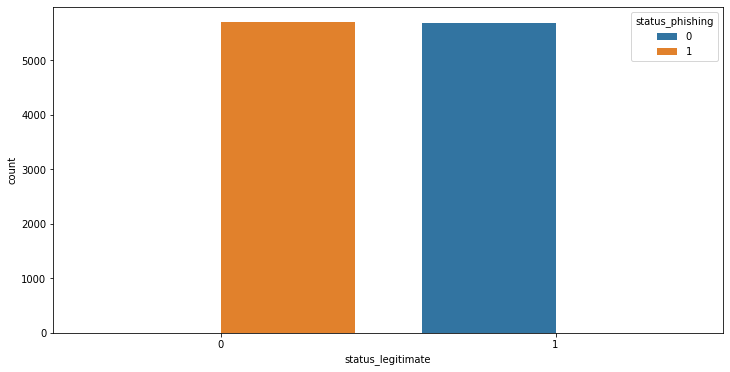

In [39]:
plt.subplots(figsize = (12,6))
sns.countplot(x = 'status_legitimate', hue = 'status_phishing', data = fin)

We can see from the above tests that the dataset is extremly well balanced and defined